# Atelier 02 : Apprentissage non supervisé avec Python

<h2> I. Réduction de dimensions et Visualisation des données 

<h4> 1. Chargement des données et préparation

In [28]:
import numpy as np 
np.set_printoptions(threshold=10000,suppress=True) 
import pandas as pd 
import warnings 
import matplotlib.pyplot as plt 
warnings.filterwarnings('ignore')

In [29]:
data = pd.read_csv('villes.csv', sep=';')
data.head()

,ville,janv,fev,mars,avril,mai,juin,juil,aout,sept,oct,nov,dec
0,ajac,7.7,8.7,10.5,12.6,15.9,19.8,22.0,22.2,20.3,16.3,11.8,8.7
1,ange,4.2,4.9,7.9,10.4,13.6,17.0,18.7,18.4,16.1,11.7,7.6,4.9
2,ango,4.6,5.4,8.9,11.3,14.5,17.2,19.5,19.4,16.9,12.5,8.1,5.3
3,besa,1.1,2.2,6.4,9.7,13.6,16.9,18.7,18.3,15.5,10.4,5.7,2.0
4,biar,7.6,8.0,10.8,12.0,14.7,17.8,19.7,19.9,18.5,14.8,10.9,8.2


In [30]:
X = data.iloc[:, 1:13].values 
labels = data.iloc[:, 0].values 

<h4> 2. Analyse  en  Composantes  Principales 

In [31]:
# pca
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_
explained_variance




array([0.87268193, 0.11720602, 0.00469563, 0.00264791, 0.00113528,
       0.00050136, 0.00042289, 0.00032817, 0.00015166, 0.00011764,
       0.00008364, 0.00002786])

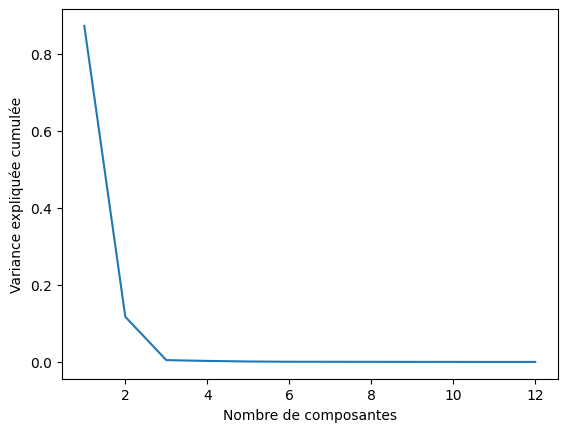

In [32]:
plt.plot(range(1, 13), explained_variance)
plt.xlabel('Nombre de composantes')
plt.ylabel('Variance expliquée cumulée')
plt.show()

Selon le graph le nombre  d’axes  à  retenir est 3 car c'est a ce moment que le courbe commence a se stabilise

In [33]:
pca.components_[:2]

array([[ 0.27151028,  0.28846164,  0.3010811 ,  0.30354174,  0.28353089,
         0.27841907,  0.27290295,  0.28757774,  0.30472022,  0.3038548 ,
         0.29242808,  0.2729549 ],
       [ 0.39933494,  0.29907184,  0.12943051, -0.11530598, -0.32314291,
        -0.35846763, -0.38879639, -0.3010133 , -0.11231622,  0.12249226,
         0.26269461,  0.38693688]])

- La premiere composante presente des coefficients positif et relativement similaires ....
- La premiere composante presente des coefficients varient de positifs à négatifs ....

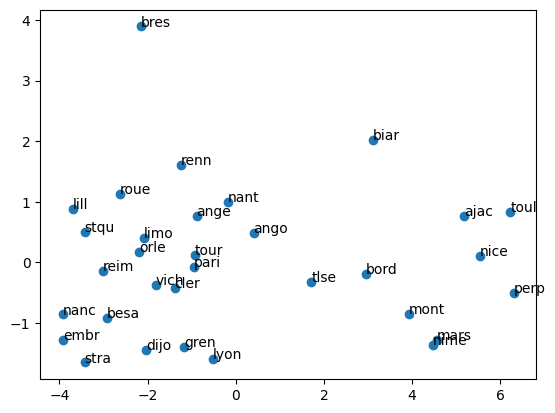

In [34]:
plt.scatter(X_pca[:, 0], X_pca[:, 1]) 
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]): 
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points') 
plt.show() 

<h4> 3. Application de PCA sur le datset "crimes.csv"

crimes est d'un dataset des statistiques de criminalité dans 50 états américain.Dans chaque état, sept types de crimes ou délits sont repérés par leurs nombres annuels de faits constatés 
rapportés  sur  100  000  habitants  :  meurtres(Meutre),  enlèvements(Rapt),  vols  avec  violence(Vol), 
agressions(Attaque), viol (Viol), vols peu importants (Larcin), vols de voitures (Auto_Theft)

In [35]:
crime_data = pd.read_csv('crimes.csv', sep=';')
crime_data.head()

,Etat,Meutre,Rapt,Vol,Attaque,Viol,Larcin,Auto_Theft
0,Alabama,14.2,25.2,96.8,278.3,1135.5,1881.9,280.7
1,Alaska,10.8,51.6,96.8,284.0,1331.7,3369.8,753.3
2,Arizona,9.5,34.2,138.2,312.3,2346.1,4467.4,439.5
3,Arkansas,8.8,27.6,83.2,203.4,972.6,1862.1,183.4
4,California,11.5,49.4,287.0,358.0,2139.4,3499.8,663.5


In [36]:
X_crime = crime_data.iloc[:, 1:8].values
labels_crime = crime_data.iloc[:, 0].values

In [37]:
# pca
scaler_crime = StandardScaler()
X_crime_scaled = scaler_crime.fit_transform(X_crime)

pca_crime = PCA()

X_crime_pca = pca_crime.fit_transform(X_crime_scaled)

explained_variance_crime = pca_crime.explained_variance_ratio_
explained_variance_crime

array([0.58785136, 0.17696026, 0.10368809, 0.04520458, 0.03685349,
       0.03171992, 0.01772229])

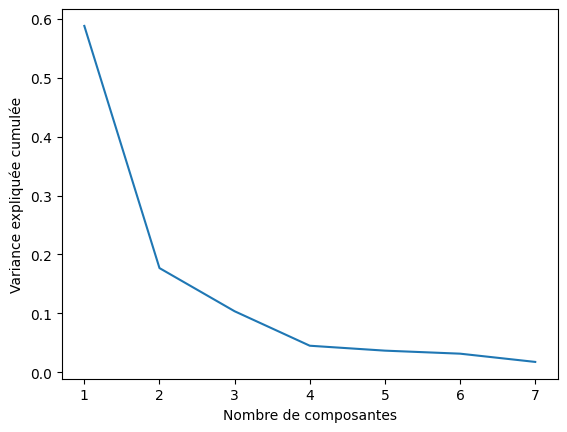

In [38]:
plt.plot(range(1, 8), explained_variance_crime)
plt.xlabel('Nombre de composantes')
plt.ylabel('Variance expliquée cumulée')
plt.show()

In [39]:
pca_crime.components_[:2]

array([[ 0.30027916,  0.43175936,  0.39687549,  0.3966517 ,  0.44015721,
         0.35735953,  0.29517681],
       [-0.62917444, -0.16943512,  0.04224698, -0.34352815,  0.20334059,
         0.40231912,  0.50242093]])

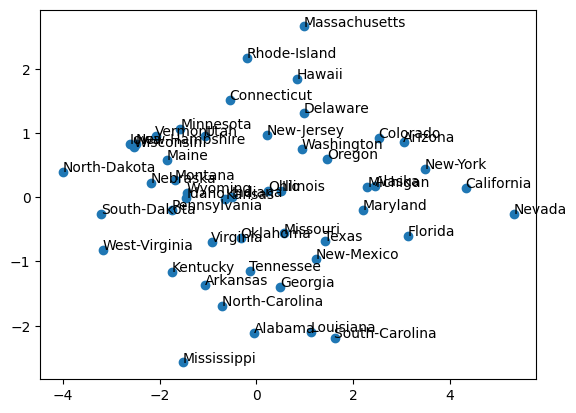

In [40]:
plt.scatter(X_crime_pca[:, 0], X_crime_pca[:, 1])
for label, x, y in zip(labels_crime, X_crime_pca[:, 0], X_crime_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

<h4> 4. Application de PCA sur 50_Startups

Un datset qui comporte 50 startups américaines décrites par leurs 
dépenses en termes de R&D, d’administration et de Marketing ainsi que leur Bénéfice annuel

In [41]:
startup_data = pd.read_csv('50_Startups.csv', sep=';')
startup_data.head()

,Id,Depenses R&D,Depenses Administration,Depenses Marketing Spend,Benefice
0,1,165349.20,136897.80,471784.10,192261.83
1,2,162597.70,151377.59,443898.53,191792.06
2,3,153441.51,101145.55,407934.54,191050.39
3,4,144372.41,118671.85,383199.62,182901.99
4,5,142107.34,91391.77,366168.42,166187.94


<h4> 5. Application de PCA sur mammals

Un dataset qui comporte des statistiques sur 62 mammifères. Pour chaque 
espèce mammifère, plusieurs variables sont rapportées: Le poids corporel, le poids du cerveau, le nombre 
d'heures  de  sommeil  sans  rêve,  le  nombre  d'heures  de  sommeil  de  rêve,  le  nombre  total  d'heures  de 
sommeil, la durée de vie en années, le temps de gestation en jours, un indice de la probabilité que le 
mammifère soit une proie, un indice du degré d'exposition du mammifère (bien protégé ou non) pendant 
son sommeil, un indice du danger auquel le mammifère est confronté par les autres animaux. Cet indice est 
basé sur la prédation et l'exposition (1 = moindre danger provenant des autres animaux. 5 = le plus grand 
danger provenant des autres animaux).

In [42]:
mammals_data = pd.read_csv('mammals.csv', sep=';')
mammals_data.head()

,Species,BodyW,BrainW,SWS,PS,TS,LifeSpan,GT,PI,SEI,ODI
0,African elephant,6654.000,5712.0,8.35,1.8,3.3,38.6,645.0,3,5,3
1,African giant pouched rat,1.000,6.6,6.30,2.0,8.3,4.5,42.0,3,1,3
2,Arctic Fox,3.385,44.5,8.35,1.8,12.5,14.0,60.0,1,1,1
3,Arctic ground squirrel,0.920,5.7,8.35,1.8,16.5,15.1,25.0,5,2,3
4,Asian elephant,2547.000,4603.0,2.10,1.8,3.9,69.0,624.0,3,5,4


<h2> II. Clustering

<h4> 1.  Application de KMeans 

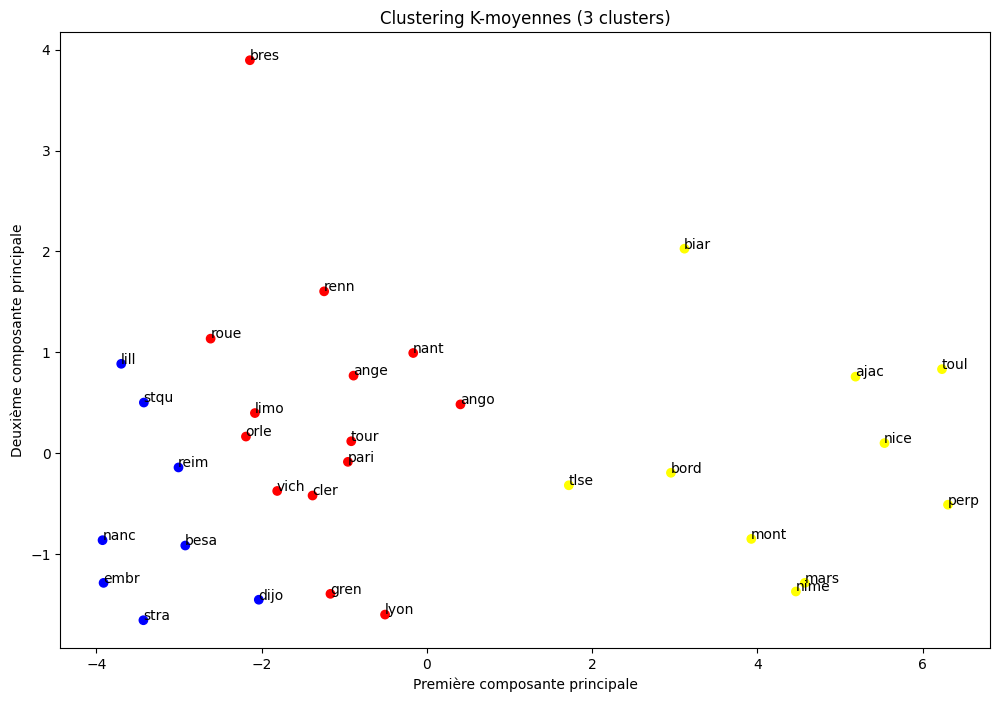

In [43]:
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap

kmeans = KMeans(n_clusters=3, random_state=42)
clustering = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(12, 8))
colors = ['red', 'yellow', 'blue']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clustering, cmap=ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')
plt.title('Clustering K-moyennes (3 clusters)')
plt.show()
